### SEIS 763-01: Homework 2
#### Completed by: Jamie Boehme

**1.  Load the patient data from “ML_HW_Data_Patients.csv” file.**

Import libraries needed for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

Import file from Github.

In [2]:
file = 'https://raw.githubusercontent.com/jamieboehme/Machine-Learning/main/ML_HW_Data_Patients.csv'
patient = pd.read_csv(file)
patient.head()

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131
3,40,75,'Female',67,'Jones','VA Hospital','Fair',0,117,133
4,49,80,'Female',64,'Brown','County General Hospital','Good',0,122,119


**2. Use variables Age, Gender, Height, Weight, Smoker, Location, Self Assessed HealthStatus to build a linear regression model to predict the systolic blood pressure.**

Do some exploratory analysis of the dataset including: reviewing number of columns and rows, data types, and overall shape of each column. Determine if there appear to be any obvious outliers. Check if there are any null values that will need to be taken care of prior to building a linear regression model.

In [3]:
patient.shape

(100, 10)

In [4]:
patient.dtypes

Age                          int64
Diastolic                    int64
Gender                      object
Height                       int64
LastName                    object
Location                    object
SelfAssessedHealthStatus    object
Smoker                       int64
Systolic                     int64
Weight                       int64
dtype: object

In [5]:
patient.describe()

,Age,Diastolic,Height,Smoker,Systolic,Weight
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,38.280000,82.960000,67.070000,0.340000,122.78000,154.000000
std,7.215416,6.932459,2.836469,0.476095,6.71284,26.571421
min,25.000000,68.000000,60.000000,0.000000,109.00000,111.000000
25%,32.000000,77.750000,65.000000,0.000000,117.75000,130.750000
50%,39.000000,81.500000,67.000000,0.000000,122.00000,142.500000
75%,44.000000,89.000000,69.250000,1.000000,127.25000,180.250000
max,50.000000,99.000000,72.000000,1.000000,138.00000,202.000000


In [6]:
patient.describe(include =object)

,Gender,LastName,Location,SelfAssessedHealthStatus
count,100,100,100,100
unique,2,100,3,4
top,'Female','Smith','County General Hospital','Good'
freq,53,1,39,40


In [7]:
patient.isnull().sum()

Age                         0
Diastolic                   0
Gender                      0
Height                      0
LastName                    0
Location                    0
SelfAssessedHealthStatus    0
Smoker                      0
Systolic                    0
Weight                      0
dtype: int64

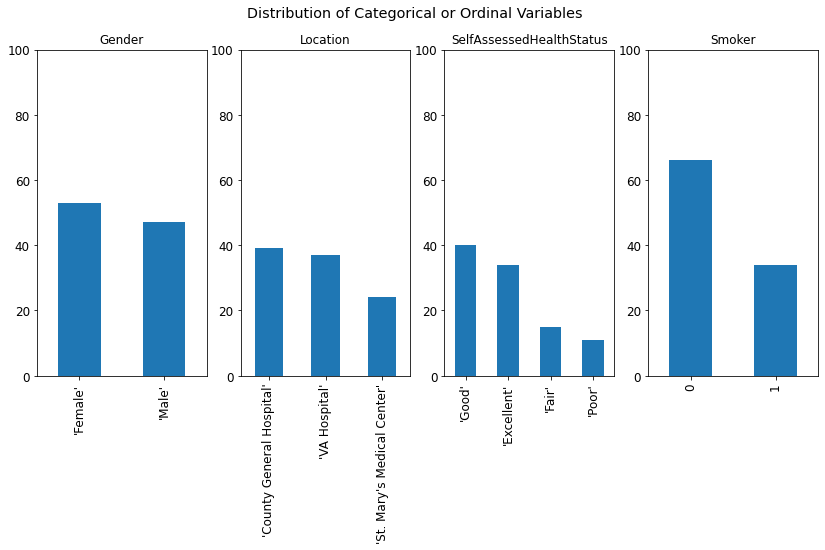

In [8]:
colors = ['mediumturquoise', 'blueviolet', 'mediumvioletred', 'palegreen']
small_size= 12
mp.rc('font', size=small_size)
mp.rc('axes', titlesize=small_size)

def graph_cat(cat_variable):
    values = patient[cat_variable].value_counts(normalize=True)
    percent = values * 100
    return percent.plot.bar(title = cat_variable, ylim=(0,100))

def cross_graph(tabular_num):
    var = pd.crosstab(patient[tabular_num], patient['Systolic'])
    graph = var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, 
                                                             title = '{} vs Current Condition'.format(tabular_num))
    return graph

catagorical_var = ['Gender', 'Location', 'SelfAssessedHealthStatus', 'Smoker']

fig1 = plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Categorical or Ordinal Variables')

plotnum=1
for cat_var in catagorical_var:
    plt.subplot(1,4,plotnum)
    graph_cat(cat_var)
    plotnum +=1
plt.show()

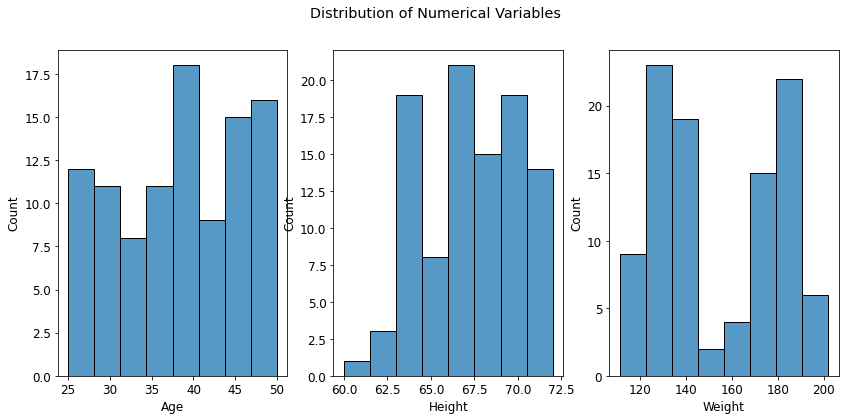

In [9]:
def graph_num(num_variable):
    sns.histplot(patient[num_variable])
    
numeric_var = ['Age', 'Height', 'Weight'] 

plot_num = plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Numerical Variables')

plotnum=1
for num_var in numeric_var:
    plt.subplot(1,3,plotnum)
    graph_num(num_var)
    plotnum +=1
plt.show()

Remove 'LastName' from dataset, as name has no bearing on Systolic, and in industry, represents PII data that should not be used for the basis of modeling. Remove 'Diastolic' from dataset as this was not part of the assignment.

In [10]:
patient = patient.drop(['LastName','Diastolic'], axis=1)

In [11]:
patient.shape

(100, 8)

Seperate numerical variables and standardize them for the purposes of modeling.

In [12]:
num_columns = patient[numeric_var]
num_df = num_columns.copy()
print(num_df)

    Age  Height  Weight
0    38      71     176
1    43      69     163
2    38      64     131
3    40      67     133
4    49      64     119
..  ...     ...     ...
95   25      69     171
96   44      69     188
97   49      70     186
98   45      68     172
99   48      66     177

[100 rows x 3 columns]


In [13]:
ZX= preprocessing.scale(num_columns)
num_df_clean = pd.DataFrame(ZX, columns = numeric_var)
print(num_df_clean, '\n')
print(num_df_clean.mean(axis=0), 
num_df_clean.std(axis=0))

         Age    Height    Weight
0  -0.039001  1.392506  0.832128
1   0.657450  0.683851  0.340416
2  -0.039001 -1.087784 -0.869952
3   0.239579 -0.024803 -0.794304
4   1.493193 -1.087784 -1.323841
..       ...       ...       ...
95 -1.849776  0.683851  0.643008
96  0.796741  0.683851  1.286017
97  1.493193  1.038178  1.210368
98  0.936031  0.329524  0.680832
99  1.353902 -0.379130  0.869952

[100 rows x 3 columns] 

Age      -1.576517e-16
Height    2.456924e-15
Weight   -1.221245e-17
dtype: float64 Age       1.005038
Height    1.005038
Weight    1.005038
dtype: float64


Perform One-Hot Encoding on dataframe for categorical variables for the purposes of data modeling.

In [14]:
catagorical_var = ['Gender', 'Location', 'SelfAssessedHealthStatus']
cat_columns = patient[catagorical_var]
cat_df = cat_columns.copy()
print(cat_df)

      Gender                     Location SelfAssessedHealthStatus
0     'Male'    'County General Hospital'              'Excellent'
1     'Male'                'VA Hospital'                   'Fair'
2   'Female'  'St. Mary's Medical Center'                   'Good'
3   'Female'                'VA Hospital'                   'Fair'
4   'Female'    'County General Hospital'                   'Good'
..       ...                          ...                      ...
95    'Male'    'County General Hospital'                   'Good'
96    'Male'                'VA Hospital'                   'Good'
97    'Male'    'County General Hospital'                   'Fair'
98    'Male'    'County General Hospital'                   'Good'
99    'Male'    'County General Hospital'                   'Fair'

[100 rows x 3 columns]


In [15]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

enc = OneHotEncoder()
new_cat = enc.fit_transform(cat_df)

In [16]:
new_cat

,Gender_'Female',Gender_'Male',Location_'County General Hospital',Location_'St. Mary's Medical Center',Location_'VA Hospital',SelfAssessedHealthStatus_'Excellent',SelfAssessedHealthStatus_'Fair',SelfAssessedHealthStatus_'Good',SelfAssessedHealthStatus_'Poor'
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
new_cat.dtypes

Gender_'Female'                         float64
Gender_'Male'                           float64
Location_'County General Hospital'      float64
Location_'St. Mary's Medical Center'    float64
Location_'VA Hospital'                  float64
SelfAssessedHealthStatus_'Excellent'    float64
SelfAssessedHealthStatus_'Fair'         float64
SelfAssessedHealthStatus_'Good'         float64
SelfAssessedHealthStatus_'Poor'         float64
dtype: object

Drop one-hot encoded columns that are already represented in the dataframe.

In [18]:
cat_df_clean = new_cat.iloc[:,[0,2,3,5,6,7]]

In [19]:
cat_df_clean

,Gender_'Female',Location_'County General Hospital',Location_'St. Mary's Medical Center',SelfAssessedHealthStatus_'Excellent',SelfAssessedHealthStatus_'Fair',SelfAssessedHealthStatus_'Good'
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
95,0.0,1.0,0.0,0.0,0.0,1.0
96,0.0,0.0,0.0,0.0,0.0,1.0
97,0.0,1.0,0.0,0.0,1.0,0.0
98,0.0,1.0,0.0,0.0,0.0,1.0


Seperate target variable, Systolic, from the current dataframe for modeling purposes.

In [20]:
Y = patient[['Systolic']]
Y

,Systolic
0,124
1,109
2,125
3,117
4,122
...,...
95,128
96,124
97,119
98,136


Combine all pre-processed columns to be used in linear regression model.

In [21]:
smoking = patient.iloc[:,5]

In [22]:
X = pd.concat([num_df_clean, cat_df_clean, smoking], axis=1)

In [23]:
print(X)

         Age    Height    Weight  Gender_'Female'  \
0  -0.039001  1.392506  0.832128              0.0   
1   0.657450  0.683851  0.340416              0.0   
2  -0.039001 -1.087784 -0.869952              1.0   
3   0.239579 -0.024803 -0.794304              1.0   
4   1.493193 -1.087784 -1.323841              1.0   
..       ...       ...       ...              ...   
95 -1.849776  0.683851  0.643008              0.0   
96  0.796741  0.683851  1.286017              0.0   
97  1.493193  1.038178  1.210368              0.0   
98  0.936031  0.329524  0.680832              0.0   
99  1.353902 -0.379130  0.869952              0.0   

    Location_'County General Hospital'  Location_'St. Mary's Medical Center'  \
0                                  1.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   1.0   
3                                  0.0     

Perform linear regression model on train and testing datasets.

In [24]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1234)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

regr= linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_ )

# The mean squared error
print("RMSE: %.2f"  %mean_squared_error(y_test, y_pred))

# score: 1 = perfect prediction
print("Variance score: %.2f" % r2_score(y_test, y_pred))

(80, 10) (20, 10) (80, 1) (20, 1)
Coefficients: 
 [[ 0.4144811   1.44918084 -1.22769637  0.11132322  1.17372403  0.57112842
  -1.29785555 -2.26349276  0.63191715 10.14294558]]
RMSE: 30.90
Variance score: 0.32


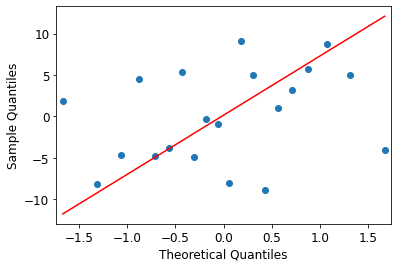

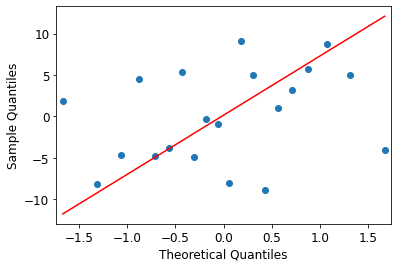

In [25]:
residuals = y_pred - y_test
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line = 'q')

**3. What are the regression coefficients (thetas)?**

In [26]:
print('The regression coefficients are: \n', regr.coef_ , '\nand a more concrete summary is below.')

The regression coefficients are: 
 [[ 0.4144811   1.44918084 -1.22769637  0.11132322  1.17372403  0.57112842
  -1.29785555 -2.26349276  0.63191715 10.14294558]] 
and a more concrete summary is below.


In [27]:
model = sm.OLS(y_train, sm.add_constant(X_train))
model_fit =model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Systolic   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     10.08
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.39e-10
Time:                        21:37:47   Log-Likelihood:                -229.00
No. Observations:                  80   AIC:                             480.0
Df Residuals:                      69   BIC:                             506.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**4. How do you interpret those numbers in thetas?**

I interepret the thetas as:
- Age and Height show to have slightly elevated impacts on systolic pressure,
- Females have a slightly elevated systolic pressure in comparison to men,
- Weight has slightly decreasing impact on systolic pressure,
- Smoking by far has the greatest impact on elevated systolic pressures
- Those individuals who give themself a 'Fair' or 'Excellent' rating for their SelfAssessedHealth status generally show lower systolic pressure than those who rate themself as 'Poor' or 'Good',
- Individuals associated with County General Hospital and St. Mary's medical center generally have more elevated systolic pressures than those associated with the VA.

In [28]:
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 10) (20, 10) (80, 1) (20, 1)


In [29]:
X_train.head(), y_train.head()

(         Age    Height    Weight  Gender_'Female'  \
 9  -1.014034 -0.379130 -0.832128              1.0   
 51  0.796741 -1.796438 -0.680832              1.0   
 29 -1.153324 -0.024803  1.210368              0.0   
 88 -1.014034 -0.379130 -0.491712              1.0   
 75 -1.014034  1.746833  0.907776              0.0   
 
     Location_'County General Hospital'  Location_'St. Mary's Medical Center'  \
 9                                  1.0                                   0.0   
 51                                 0.0                                   1.0   
 29                                 1.0                                   0.0   
 88                                 0.0                                   0.0   
 75                                 0.0                                   0.0   
 
     SelfAssessedHealthStatus_'Excellent'  SelfAssessedHealthStatus_'Fair'  \
 9                                    1.0                              0.0   
 51                           

In [30]:
outliers = model_fit.get_influence()
leverage = outliers.hat_matrix_diag
dffits = outliers.dffits[0]
resid_stu = outliers.resid_studentized_external
cook = outliers.cooks_distance[0]
contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'),
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook')],axis = 1)
X_train.index = range(X_train.shape[0])
df_outliers = pd.concat([X_train,contat1], axis = 1)
outlier_rows = np.where(np.abs(df_outliers.resid_stu)>2)

In [31]:
y_train.index = range(y_train.shape[0])

**5. If you need to identify one outlier record, which record is a potential outlier? How do you reach this conclusion?**

In [32]:
print("\n5. The outliers are:", outlier_rows, '\n')


5. The outliers are: (array([36, 64, 66, 68, 78]),) 



I came to this conclusion by determining the level of influence on each of the fitted data points, influence being loosely defined as deleting the observations one at a time and refitting the regression model and comparing the current model vs the new model with the observation deleted (https://online.stat.psu.edu/stat462/node/173/).  I measured the distance of the data points to the model using three different methods, and any standardized outlier greater than 2 standard deviations away from the model was identified and flagged as an outlier for potential removal from the model.

In [33]:
X_1 = X_train.drop(outlier_rows[0])  # outliers
y = y_train.drop(outlier_rows[0])

In [34]:
print(X_1.shape, y.shape)

(75, 10) (75, 1)


In [35]:
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1,y,test_size = 0.20)
reg = linear_model.LinearRegression()
reg.fit(X_1train, y_1train)
y_1pred = reg.predict(X_1test)

In [36]:
print("\nRMSE: %.2f" %(mean_squared_error(y_1test, y_1pred)) ** 0.5)
X2 = sm.add_constant(X_1train)
RE = sm.OLS(y_1train, X2)
RE2 =RE.fit()
print(RE2.summary())


RMSE: 4.56
                            OLS Regression Results                            
Dep. Variable:               Systolic   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     11.87
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.79e-10
Time:                        21:37:47   Log-Likelihood:                -157.11
No. Observations:                  60   AIC:                             336.2
Df Residuals:                      49   BIC:                             359.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**6. If you need to identify one or few useless features (independent variables or predictors), which one(s) will you choose? Why do you reach this conclusion?**

If I needed to identify one or few useless features, I would choose the features that have least impact on the model, shown by the weight of the coefficient. In this case, I would consider eliminating Gender_Female (eliminating Gender as a factor, Female and Male), Height, and Weight. Theoretically this makes sense, however, in actuallity I would consider having a far greater sample size as those features would fundamentally seem important. If I had to choose only one feature for the entire model, it would be using the 'Smoker' feature, as it appears to have the most impact on predicting Systolic pressure.